In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

In [2]:
titanic = pd.read_csv("titanic.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic["Ticket"]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

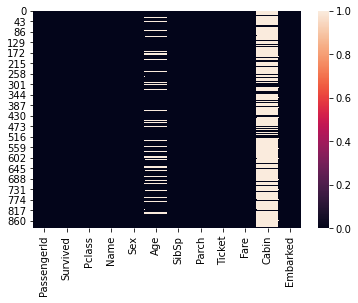

In [6]:
sns.heatmap(titanic.isnull())

In [7]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


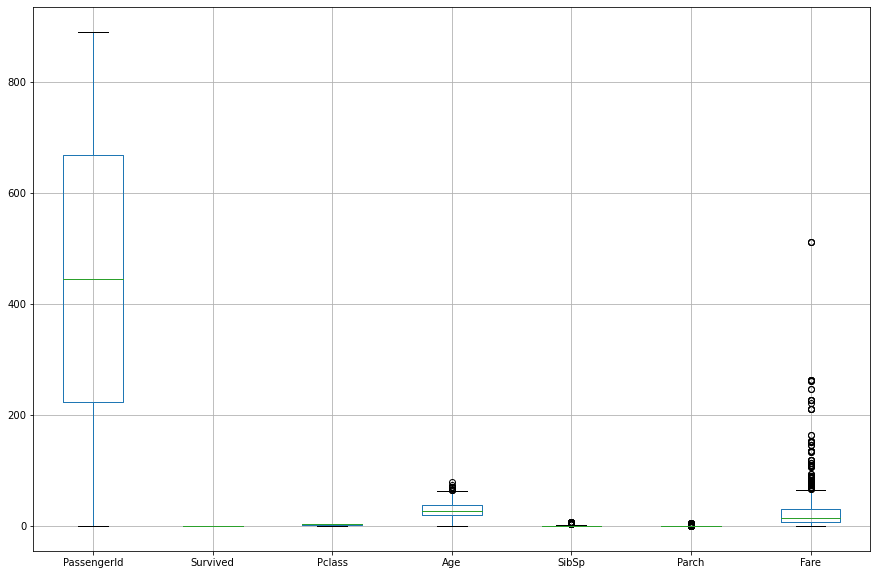

In [10]:
titanic.boxplot(figsize = (15,10))

In [11]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

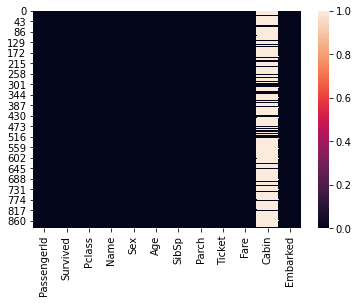

In [14]:
sns.heatmap(titanic.isnull())

In [15]:
titanic["Cabin"] = titanic["Cabin"].fillna(titanic["Cabin"].mode()[0])

In [16]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [17]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [18]:
titanic["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [19]:
titanic["Embarked"] = titanic["Embarked"].fillna(titanic["Embarked"].mode()[0])

In [20]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [21]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [22]:
titanic.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

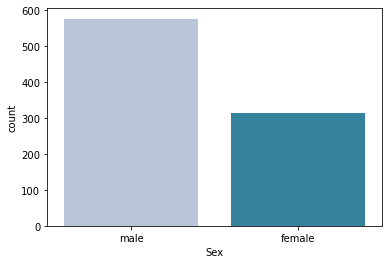

In [23]:
sns.countplot(data = titanic, x="Sex", palette = "PuBuGn")

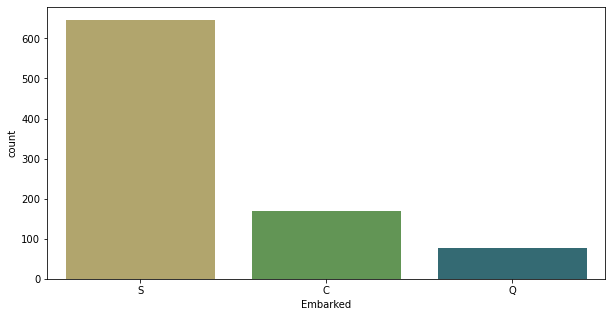

In [24]:
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=titanic, x="Embarked", palette = "gist_earth_r")


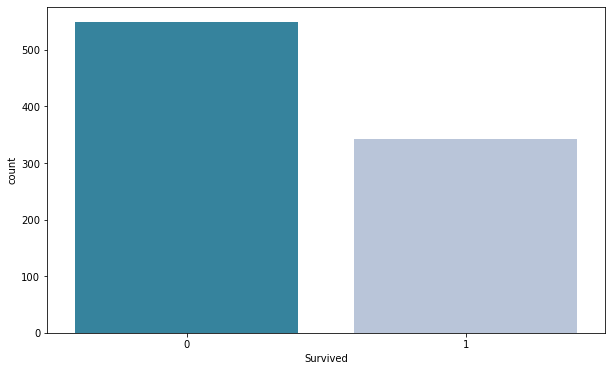

In [25]:
fig_size = (10,6)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=titanic, x="Survived", palette = "PuBuGn_r")


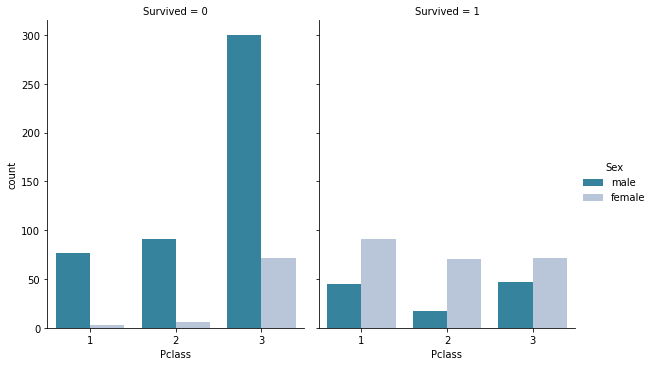

In [26]:
sns.catplot(data=titanic, x="Pclass", hue="Sex", col="Survived", palette= "PuBuGn_r",kind="count", height=5, aspect=.8)

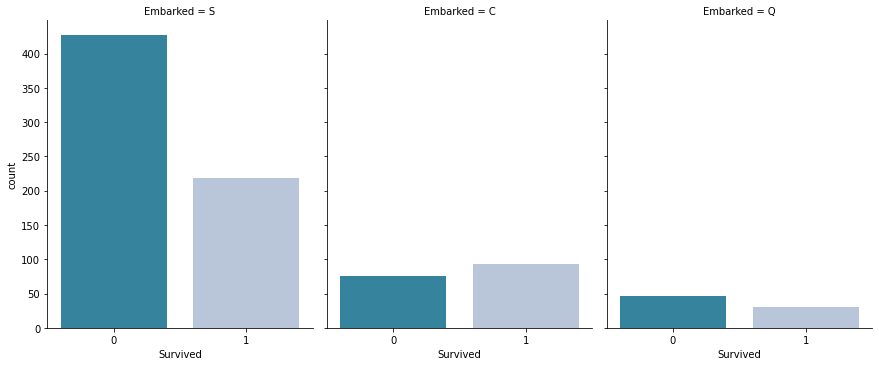

In [27]:
sns.catplot(data=titanic, x="Survived", col="Embarked", col_wrap= 4, kind="count",palette= "PuBuGn_r", height=5, aspect=.8)

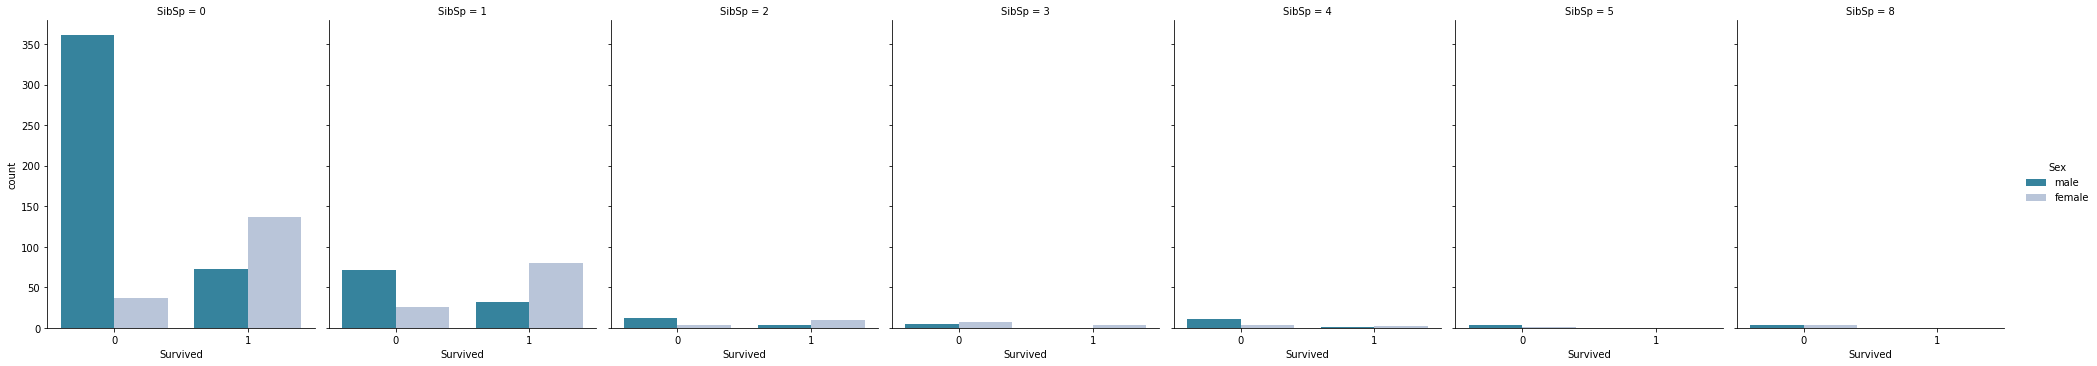

In [28]:
sns.catplot(data=titanic, x="Survived", hue="Sex", col="SibSp",palette= "PuBuGn_r", col_wrap = 7,  kind="count", height=5, aspect=.8)

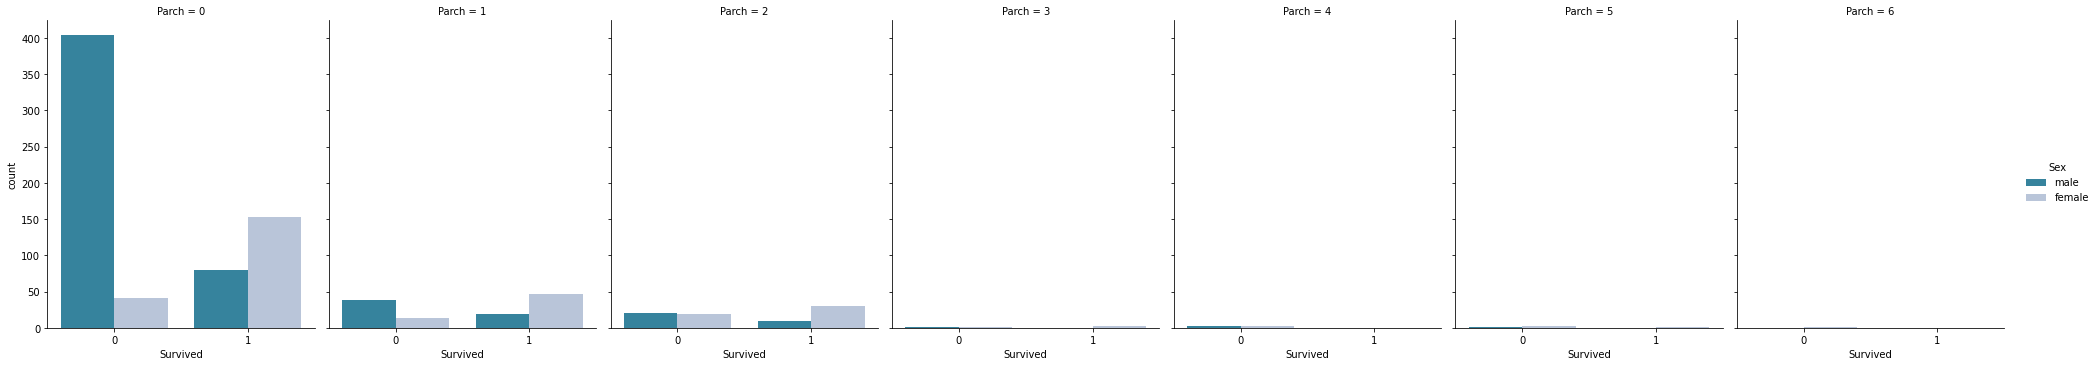

In [29]:
sns.catplot(data=titanic, x="Survived", hue="Sex", col="Parch",palette= "PuBuGn_r",  kind="count", height=5, aspect=.8)

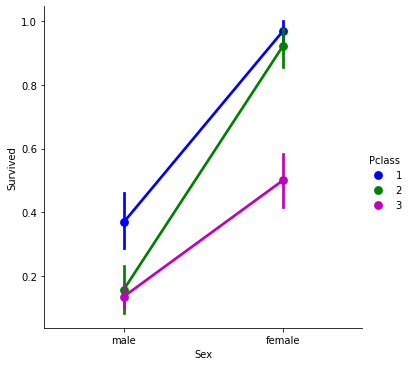

In [30]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="point", data = titanic, palette={1 :"b", 2:"g", 3:"m"})

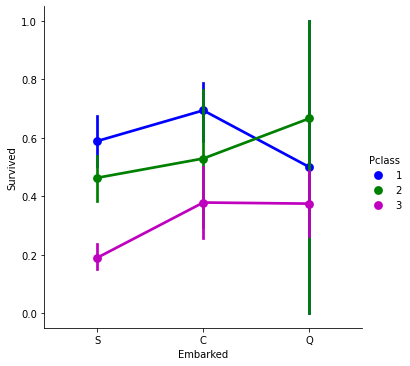

In [31]:
sns.catplot(x="Embarked", y="Survived", hue="Pclass", kind="point", data = titanic, palette={1 :"b", 2:"g", 3:"m"})

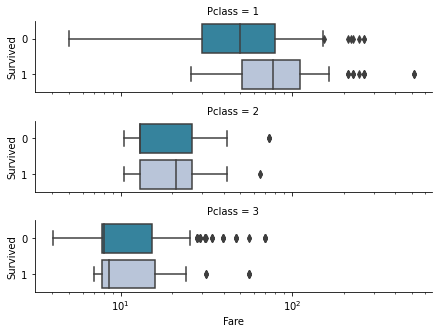

In [32]:
fare_survived = sns.catplot(x = "Fare", y="Survived",palette= "PuBuGn_r", row="Pclass", kind = "box", orient = "h", height = 1.5,aspect =4, data= titanic.query("Fare > 0 "))
fare_survived.set(xscale="log")

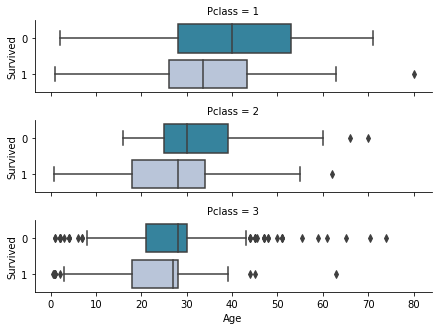

In [33]:
Age_survived = sns.catplot(x = "Age", y="Survived", row="Pclass",palette= "PuBuGn_r", kind = "box", orient = "h", height = 1.5,aspect =4, data= titanic.query("Fare > 0 "))
#fare_survived.set(xscale="log")

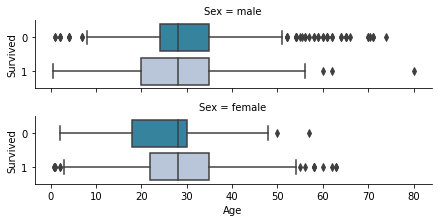

In [34]:
Age_survived = sns.catplot(x = "Age", y="Survived", palette= "PuBuGn_r",row="Sex", kind = "box", orient = "h", height = 1.5,aspect =4, data= titanic.query("Fare > 0 "))
#fare_survived.set(xscale="log")

In [35]:
# import label encoder
from sklearn.preprocessing import LabelEncoder

#intialize label encoder
LE = LabelEncoder()

#change the categorical varaiables to numerical variables
titanic["Embarked"] = LE.fit_transform(titanic["Embarked"])


In [36]:
titanic["Sex"] = LE.fit_transform(titanic["Sex"])

In [37]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,2


In [38]:
df1 = titanic[["Name"]].copy()

In [39]:
df1.head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


In [40]:
df1 = df1["Name"].str.split(" ", n=-1, expand = True)


In [41]:
title = df1[[1]].copy()

In [42]:
title.rename(columns = {1:"Title"}, inplace = True)

In [43]:
title

,Title
0,Mr.
1,Mrs.
2,Miss.
3,Mrs.
4,Mr.
...,...
886,Rev.
887,Miss.
888,Miss.
889,Mr.


In [44]:
titanic["Title"] = title

In [45]:
titanic = titanic.drop("Name", axis = 1)

In [46]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,B96 B98,2,Mr.
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,0,Mrs.
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2,Miss.
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,2,Mrs.
4,5,0,3,1,35.0,0,0,373450,8.0500,B96 B98,2,Mr.


In [47]:
titanic["Title"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Don.', 'Rev.',
       'Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,'], dtype=object)

In [48]:
titanic["Title"].mode()

0    Mr.
dtype: object

In [49]:
wrng_titles = {'Billiard,', 'der','Planke,','Walle,','Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,','Impe,','Gordon,','Messemaeker,','Velde,', 'the', 'Shawah,','Melkebeke,', 'Cruyssen,'}

wnrg_dict_title = {i : "Mr." for i in wrng_titles}

In [50]:
wnrg_dict_title

{'Mulder,': 'Mr.',
 'Planke,': 'Mr.',
 'Carlo,': 'Mr.',
 'Melkebeke,': 'Mr.',
 'the': 'Mr.',
 'y': 'Mr.',
 'Velde,': 'Mr.',
 'Messemaeker,': 'Mr.',
 'Shawah,': 'Mr.',
 'Impe,': 'Mr.',
 'Billiard,': 'Mr.',
 'Cruyssen,': 'Mr.',
 'Steen,': 'Mr.',
 'Pelsmaeker,': 'Mr.',
 'der': 'Mr.',
 'Walle,': 'Mr.',
 'Gordon,': 'Mr.'}

In [51]:
titanic["Title"].replace(wnrg_dict_title, inplace=True)

In [52]:
titanic["Title"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Mlle.', 'Col.', 'Capt.', 'Jonkheer.'],
      dtype=object)

In [53]:
titanic["Title"] = LE.fit_transform(titanic["Title"])

In [54]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,B96 B98,2,10
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,0,11
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2,7
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,2,11
4,5,0,3,1,35.0,0,0,373450,8.0500,B96 B98,2,10


In [55]:
group_title_survived = titanic.groupby("Title")["Survived"].mean()

In [56]:
group_title_survived

Title
0     0.000000
1     0.500000
2     0.000000
3     0.428571
4     0.000000
5     0.500000
6     0.575000
7     0.703911
8     1.000000
9     1.000000
10    0.165085
11    0.801653
12    1.000000
13    0.000000
Name: Survived, dtype: float64

In [57]:
titanic["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [58]:
def forage(row):
    if row["Age"] <=18:
        val = 0
    elif row["Age"] >18 and row["Age"] >=25:
        val = 1
    else:
        val = 2
    return val

In [59]:
titanic["Age"] = titanic.apply(forage, axis=1)

In [60]:
titanic["Age"].describe()

count    891.000000
mean       1.000000
std        0.558891
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: Age, dtype: float64

In [61]:
group_age_survived = titanic.groupby("Age")["Survived"].mean()

In [62]:
index = [0,1,2]
group_age_survived = pd.DataFrame(group_age_survived)

In [63]:
group_age_survived.set_index(pd.Index([0,1,2]))

,Survived
0,0.503597
1,0.365416
2,0.345324


In [64]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,2,1,0,A/5 21171,7.2500,B96 B98,2,10
1,2,1,1,0,1,1,0,PC 17599,71.2833,C85,0,11
2,3,1,3,0,1,0,0,STON/O2. 3101282,7.9250,B96 B98,2,7
3,4,1,1,0,1,1,0,113803,53.1000,C123,2,11
4,5,0,3,1,1,0,0,373450,8.0500,B96 B98,2,10


In [65]:
uni = titanic["Cabin"].unique()
sorted(uni)

['A10',
 'A14',
 'A16',
 'A19',
 'A20',
 'A23',
 'A24',
 'A26',
 'A31',
 'A32',
 'A34',
 'A36',
 'A5',
 'A6',
 'A7',
 'B101',
 'B102',
 'B18',
 'B19',
 'B20',
 'B22',
 'B28',
 'B3',
 'B30',
 'B35',
 'B37',
 'B38',
 'B39',
 'B4',
 'B41',
 'B42',
 'B49',
 'B5',
 'B50',
 'B51 B53 B55',
 'B57 B59 B63 B66',
 'B58 B60',
 'B69',
 'B71',
 'B73',
 'B77',
 'B78',
 'B79',
 'B80',
 'B82 B84',
 'B86',
 'B94',
 'B96 B98',
 'C101',
 'C103',
 'C104',
 'C106',
 'C110',
 'C111',
 'C118',
 'C123',
 'C124',
 'C125',
 'C126',
 'C128',
 'C148',
 'C2',
 'C22 C26',
 'C23 C25 C27',
 'C30',
 'C32',
 'C45',
 'C46',
 'C47',
 'C49',
 'C50',
 'C52',
 'C54',
 'C62 C64',
 'C65',
 'C68',
 'C7',
 'C70',
 'C78',
 'C82',
 'C83',
 'C85',
 'C86',
 'C87',
 'C90',
 'C91',
 'C92',
 'C93',
 'C95',
 'C99',
 'D',
 'D10 D12',
 'D11',
 'D15',
 'D17',
 'D19',
 'D20',
 'D21',
 'D26',
 'D28',
 'D30',
 'D33',
 'D35',
 'D36',
 'D37',
 'D45',
 'D46',
 'D47',
 'D48',
 'D49',
 'D50',
 'D56',
 'D6',
 'D7',
 'D9',
 'E10',
 'E101',
 'E12',
 

In [66]:
df2 = titanic[["Cabin"]].copy()

In [67]:
df2

,Cabin
0,B96 B98
1,C85
2,B96 B98
3,C123
4,B96 B98
...,...
886,B96 B98
887,B42
888,B96 B98
889,C148


In [68]:
df2=df2["Cabin"].str.split(r'(\w+?)(\d+)', n=-1, expand=True)

In [69]:
cabin = df2[[1]].copy()

In [70]:
cabin

,1
0,B
1,C
2,B
3,C
4,B
...,...
886,B
887,B
888,B
889,C


In [71]:
cabin.rename(columns = {1:"Cabin_Name"}, inplace = True)

In [72]:
cabin

,Cabin_Name
0,B
1,C
2,B
3,C
4,B
...,...
886,B
887,B
888,B
889,C


In [73]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [74]:
titanic = titanic.drop("Cabin", axis = 1)

In [75]:
titanic["Cabin_Name"] = cabin

In [76]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Cabin_Name
0,1,0,3,1,2,1,0,A/5 21171,7.2500,2,10,B
1,2,1,1,0,1,1,0,PC 17599,71.2833,0,11,C
2,3,1,3,0,1,0,0,STON/O2. 3101282,7.9250,2,7,B
3,4,1,1,0,1,1,0,113803,53.1000,2,11,C
4,5,0,3,1,1,0,0,373450,8.0500,2,10,B


In [77]:
titanic["Cabin_Name"].isnull().sum()

4

In [78]:

titanic["Cabin_Name"] = titanic["Cabin_Name"].fillna(titanic["Cabin_Name"].mode()[0])

In [79]:
titanic["Cabin_Name"] = LE.fit_transform(titanic["Cabin_Name"])

In [80]:
titanic.shape

(891, 12)

In [81]:
group_cabin_survived = titanic.groupby("Cabin_Name")["Survived"].mean()

In [82]:
group_cabin_survived

Cabin_Name
0    0.466667
1    0.329268
2    0.593220
3    0.766667
4    0.757576
5    0.777778
6    0.285714
Name: Survived, dtype: float64

In [83]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Cabin_Name
0,1,0,3,1,2,1,0,A/5 21171,7.2500,2,10,1
1,2,1,1,0,1,1,0,PC 17599,71.2833,0,11,2
2,3,1,3,0,1,0,0,STON/O2. 3101282,7.9250,2,7,1
3,4,1,1,0,1,1,0,113803,53.1000,2,11,2
4,5,0,3,1,1,0,0,373450,8.0500,2,10,1


In [84]:
titanic["Cabin_Name"].unique()

array([1, 2, 4, 6, 3, 0, 5])

In [85]:
titanic["Ticket"]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [86]:
titanic = titanic.drop("Ticket", axis = 1)

In [87]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_Name
0,1,0,3,1,2,1,0,7.2500,2,10,1
1,2,1,1,0,1,1,0,71.2833,0,11,2
2,3,1,3,0,1,0,0,7.9250,2,7,1
3,4,1,1,0,1,1,0,53.1000,2,11,2
4,5,0,3,1,1,0,0,8.0500,2,10,1


In [88]:
titanic.shape

(891, 11)

In [89]:
#sns.pairplot(titanic)

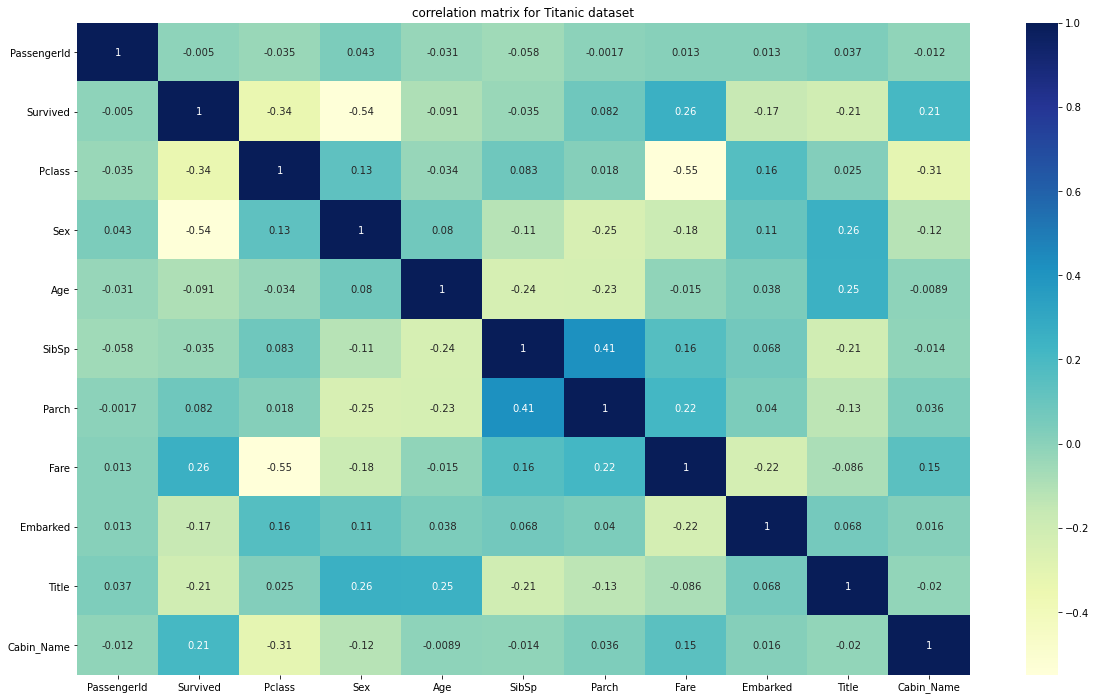

In [90]:
corr_mat = titanic.corr()
plt.figure(figsize=[20,12])
sns.heatmap(corr_mat, annot=True, cmap="YlGnBu")
plt.title("correlation matrix for Titanic dataset")
plt.show()

In [91]:
corr_matrix = titanic.corr()
corr_matrix["Survived"].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Cabin_Name     0.209244
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.090895
Embarked      -0.167675
Title         -0.207924
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

In [92]:
titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_Name
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,1.000000,0.523008,0.381594,32.204208,1.536476,9.257015,1.307520
std,257.353842,0.486592,0.836071,0.477990,0.558891,1.102743,0.806057,49.693429,0.791503,1.742446,0.903016
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,7.910400,1.000000,7.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,14.454200,2.000000,10.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,31.000000,2.000000,10.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,2.000000,8.000000,6.000000,512.329200,2.000000,13.000000,6.000000


In [93]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Title', 'Cabin_Name'],
      dtype='object')

In [94]:
x = titanic.drop("Survived", axis = 1)
y = titanic["Survived"]

In [95]:
x.skew()

PassengerId    0.000000
Pclass        -0.630548
Sex           -0.618921
Age            0.000000
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.264823
Title         -1.398025
Cabin_Name     2.952439
dtype: float64

In [118]:
x.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked',
       'Title', 'Cabin_Name', 'Fare'],
      dtype='object')

In [96]:
x["Fare"].skew()


4.787316519674893

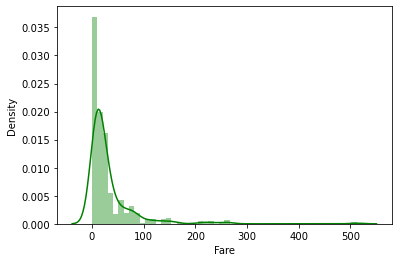

In [97]:
sns.distplot(x["Fare"],kde=True, color = 'g')
plt.show()

In [98]:
# implementing power transform to remove skewness
from sklearn.preprocessing import power_transform

df4 = x[["Fare"]].copy()
dfx_trans = power_transform(df4)

dfx_trans = pd.DataFrame(dfx_trans, columns = df4.columns)

In [99]:
dfx_trans.skew()

Fare   -0.040329
dtype: float64

In [100]:
x = x.drop("Fare", axis=1)
x["Fare"] = dfx_trans

In [101]:
x.skew()

PassengerId    0.000000
Pclass        -0.630548
Sex           -0.618921
Age            0.000000
SibSp          3.695352
Parch          2.749117
Embarked      -1.264823
Title         -1.398025
Cabin_Name     2.952439
Fare          -0.040329
dtype: float64

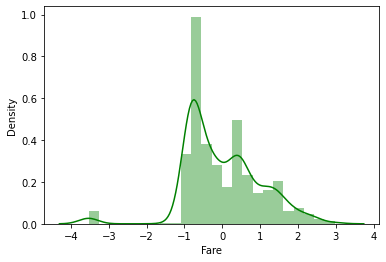

In [102]:
sns.distplot(x["Fare"],kde=True, color = 'g')
plt.show()

In [103]:
x.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
Title          0
Cabin_Name     0
Fare           0
dtype: int64

In [104]:
x["Fare"] = x["Fare"].fillna(x["Fare"].median())

In [105]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
## finding the best random state
maxAccu = 0
maxRS = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = i)
    lr.fit(x_train, y_train)
    predf = lr.predict(x_test)
    acc = accuracy_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.8491620111731844  on Random State  34


In [106]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = 34)

In [107]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(179, 10)
(179,)
(712, 10)
(712,)


In [108]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

0.8491620111731844
[[107  11]
 [ 16  45]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       118
           1       0.80      0.74      0.77        61

    accuracy                           0.85       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



In [109]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.7932960893854749
[[99 19]
 [18 43]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       118
           1       0.69      0.70      0.70        61

    accuracy                           0.79       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [110]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators =100)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

0.88268156424581
[[104  14]
 [  7  54]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       118
           1       0.79      0.89      0.84        61

    accuracy                           0.88       179
   macro avg       0.87      0.88      0.87       179
weighted avg       0.89      0.88      0.88       179



In [111]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()

ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("Accuracy score of " ,ad, " is: ")
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

Accuracy score of  AdaBoostClassifier()  is: 
0.8659217877094972
[[106  12]
 [ 12  49]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       118
           1       0.80      0.80      0.80        61

    accuracy                           0.87       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.87      0.87      0.87       179



In [124]:
from sklearn.model_selection import cross_val_score

lr_scr = cross_val_score(lr, x, y, cv = 5)
print("the cross validation score of Logisting regression model :", lr_scr.mean())

the cross validation score of Logisting regression model : 0.7845458539953549


In [125]:
from sklearn.model_selection import cross_val_score

dt_scr = cross_val_score(dt, x, y, cv = 5)
print("the cross validation score of Decision tree model :", dt_scr.mean())

the cross validation score of Decision tree model : 0.7644655075010984


In [126]:
from sklearn.model_selection import cross_val_score

rf_scr = cross_val_score(rf, x, y, cv = 5)
print("the cross validation score of random forest model :", rf_scr.mean())

the cross validation score of random forest model : 0.8003012993534618


In [127]:
from sklearn.model_selection import cross_val_score

rf_scr = cross_val_score(ad, x, y, cv = 5)
print("the cross validation score of random forest model :", rf_scr.mean())

the cross validation score of random forest model : 0.7318937919779047


In [113]:
from sklearn.model_selection import GridSearchCV
#creating parameters list to pass in Grid SearchCV

parameters = {'max_depth': np.arange(2,15),
              "criterion": ["gini","entropy"]
    
}
GCV = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)
GCV.fit(x_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [114]:
GCV.best_params_
#printing the best parameter found by GridSearchCV

{'criterion': 'entropy', 'max_depth': 4}

In [115]:
GCV_pred = GCV.best_estimator_.predict(x_test)

In [116]:
accuracy_score(y_test, GCV_pred)

0.8435754189944135

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


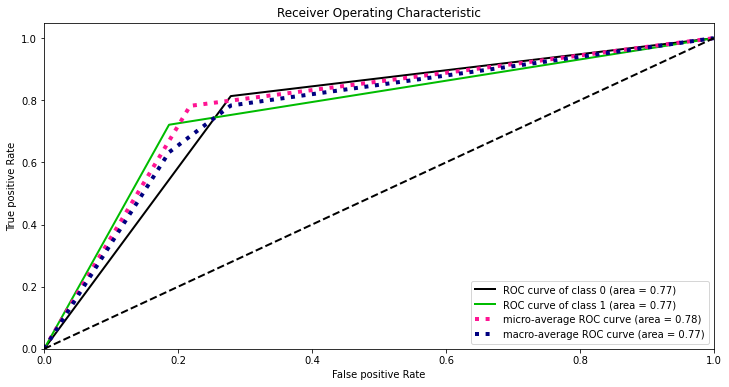

In [128]:
from sklearn.metrics import roc_curve, auc
import scikitplot as skplt
test_prob = dt.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, test_prob,
                       title="Digits ROC Curve", figsize=(12,6));

plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

In [129]:
import joblib
joblib.dump(GCV.best_estimator_, "TitancDTC.obj")

['TitancDTC.obj']

In [131]:
import numpy as np
a = np.array(y_test)
predicted = np.array(preddt)
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con.head()

,orginal,predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
